In [134]:
%load_ext autoreload
%autoreload 2

import pandas as pd
    
import common.easy_options as eo

from datetime import datetime, timezone

from common.easy_options_data_fileaccess import EasyOptionsDataFileAccess

options_data_filename = 'websocket_options_log.txt'

start_time = datetime(2023, 11, 19, 20, 0, 0, 0, tzinfo=timezone.utc)
end_time = datetime(2023, 11, 20, 20, 0, 0, 0,  tzinfo=timezone.utc)
options_data_access = EasyOptionsDataFileAccess(options_data_filename)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
options_data_access.fetch_options_pricing_data_from_file(start_time.timestamp(), end_time.timestamp())

eo_strategy = eo.EasyOptionsStrategy(eo.EasyOptionsData(options_data_access))

In [ ]:
interval_sec = 10 # Backtest tick interval
eo_strategy.backtest_options_strategy(start_time, end_time, interval_sec)

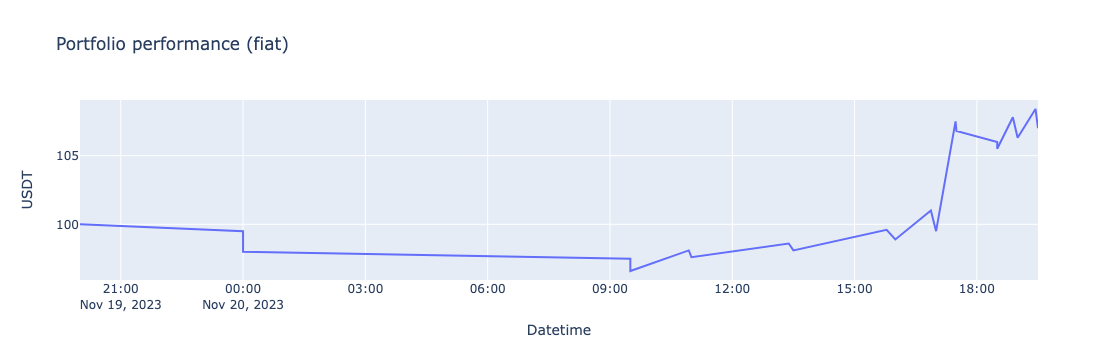

In [133]:
import plotly.express as px

def plot_performance():
    performance_df = eo_strategy.get_historical_inventory_df('USDT')
    
    fig = px.line(performance_df, x='datetime', y='USDT', title=f'Portfolio performance (fiat)')
    fig.update_xaxes(title_text='Datetime')
    fig.update_yaxes(title_text='USDT')
    fig.update_layout({"height": 500})
    
    fig.show()

plot_performance()

In [139]:
eo_strategy.get_closed_trades()

[Trade(asset_key='BTC-20NOV230000H-37250-PUT', timestamp=1700438400.0, side='sell', quantity=10, execution_price=Decimal('0'), fee=Decimal('0.05'), pnl=Decimal('-0.5000000000000000277555756156')),
 Trade(asset_key='BTC-20NOV230000H-37470-CALL', timestamp=1700438400.0, side='sell', quantity=10, execution_price=Decimal('0'), fee=Decimal('0.05'), pnl=Decimal('-1.499999999999999944488848769')),
 Trade(asset_key='BTC-20NOV230930H-37020-PUT', timestamp=1700472600.0, side='sell', quantity=10, execution_price=Decimal('0'), fee=Decimal('0.05'), pnl=Decimal('-0.5000000000000000277555756156')),
 Trade(asset_key='BTC-20NOV230930H-37240-CALL', timestamp=1700472600.0, side='sell', quantity=10, execution_price=Decimal('0'), fee=Decimal('0.05'), pnl=Decimal('-0.8999999999999999666933092612')),
 Trade(asset_key='BTC-20NOV231100H-37280-CALL', timestamp=1700477760.0, side='sell', quantity=10, execution_price=Decimal('0.2900000000000000244249065418'), fee=Decimal('0.05'), pnl=Decimal('1.500000000000000111